# Multilabel Image Classification - Movie Poster

### Import necessary Modules

In [10]:
#IMPORT MODULES

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [11]:
# # clone repository of movie poster dataset
# !git clone https://github.com/laxmimerit/Movies-Poster_Dataset.git

In [12]:
# Check version
print(tf.__version__)

2.15.0


### Reading Dataset using pandas df and showing the contents

In [13]:
df = pd.read_csv('Movies-Poster_Dataset/train.csv')

In [14]:
df.shape

(7254, 27)

In [15]:
# Show first 5 data contents
df.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Data and Image Processing 

This code resizes a set of images to a fixed size of 350x350 pixels, converts them into arrays, and normalizes their pixel values to a range between 0 and 1. It stores these processed images in a NumPy array called ARR.

In [16]:
# Images in the dataset is of different size and dimension. In order to process the dataset 
# we need to have them be at a fixed size.

img_w = 350 # set width
img_h = 350 # set height

ARR = []

for i in tqdm(range(df.shape[0])):
    path = 'Movies-Poster_Dataset/Images/' + df['Id'][i] + '.jpg'
    img = image.load_img(path, target_size=(img_w, img_h, 3))
    img = image.img_to_array(img)
    img = img/255.0 # images value range between 0-255. meanwhile neural networks work well with values 0 to 1. therefore, we are going to divide the values by 255.
    ARR.append(img)

ARR = np.array(ARR)

100%|██████████| 7254/7254 [00:37<00:00, 193.79it/s]


### 7254 is the number of image, Image size is 350 x 350, and is 3 dimensional because the image is coloured

In [17]:
ARR.shape

(7254, 350, 350, 3)

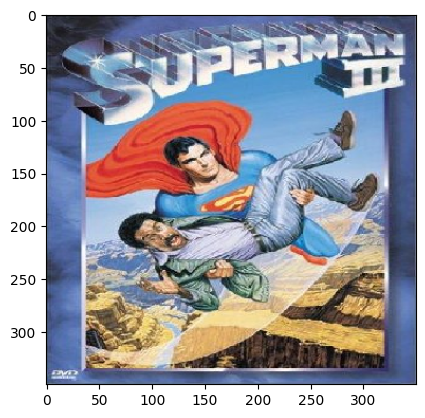

In [23]:
plt.imshow(ARR[10])

In [24]:
df['Genre'][10]

"['Action', 'Comedy', 'Sci-Fi']"

In [25]:
y = df.drop(['Id', 'Genre'], axis = 1)
y = y.to_numpy()
y.shape

(7254, 25)

This code splits the dataset ARR and corresponding labels y into training and testing sets. It reserves 15% of the data for testing, using a random state of 0 for reproducibility. Then, it accesses the shape of the first element in the training set ARR_train.

In [33]:
ARR_train, ARR_test, y_train, y_test = train_test_split(ARR, y, random_state = 0, test_size = 0.15)

ARR_train[0].shape

(350, 350, 3)

This code builds a CNN using Keras, starting with convolutional layers for feature extraction, followed by batch normalization and ReLU activation for non-linearity. Max-pooling layers downsample the features, and dropout regularizes the network. Fully connected layers with ReLU activation, batch normalization, and dropout follow, ending with a sigmoid output layer for multi-label classification.

In [35]:
model = Sequential() # Initializes a sequential model.
model.add(Conv2D(16, (3,3), activation='relu', input_shape = ARR_train[0].shape)) # Adds a 2D convolutional layer with 16 filters, each with a 3x3 kernel, ReLU activation, and input shape based on the shape of elements in ARR_train.
model.add(BatchNormalization()) # Normalizes the activations of the previous layer.
model.add(MaxPool2D(2,2)) # Adds a max-pooling layer with a 2x2 pool size.
model.add(Dropout(0.3)) # a regularization technique used to prevent overfitting by randomly setting a fraction of input units to zero during training. 

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu')) # flattened into 1D array
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(25, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 348, 348, 16)      448       
                                                                 
 batch_normalization_6 (Bat  (None, 348, 348, 16)      64        
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 174, 174, 16)      0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 174, 174, 16)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 172, 172, 32)      4640      
                                                                 
 batch_normalization_7 (Bat  (None, 172, 172, 32)     

This code compiles and trains a convolutional neural network (CNN) model using Keras. It uses the Adam optimizer with binary crossentropy loss and accuracy as the metric. The model is trained for 5 epochs and its performance is evaluated on validation data. The output includes training and validation loss along with accuracy for each epoch, and likely some sample predictions and corresponding classes.

In [36]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(ARR_train, y_train, epochs=5, validation_data=(ARR_test, y_test))


Epoch 1/5


193/193 [==============================] - 220s 1s/step - loss: 0.6914 - accuracy: 0.0981 - val_loss: 0.3056 - val_accuracy: 0.1901
Epoch 2/5
193/193 [==============================] - 195s 1s/step - loss: 0.3136 - accuracy: 0.2500 - val_loss: 0.2478 - val_accuracy: 0.3104
Epoch 3/5
193/193 [==============================] - 191s 991ms/step - loss: 0.2625 - accuracy: 0.2774 - val_loss: 0.2430 - val_accuracy: 0.2957
Epoch 4/5
193/193 [==============================] - 192s 997ms/step - loss: 0.2524 - accuracy: 0.2985 - val_loss: 0.2434 - val_accuracy: 0.3058
Epoch 5/5
193/193 [==============================] - 196s 1s/step - loss: 0.2476 - accuracy: 0.2951 - val_loss: 0.2400 - val_accuracy: 0.3269


This function plot_learningCurve visualizes the training progress of a neural network model by plotting training and validation accuracy, as well as training and validation loss, over the specified number of epochs. It's useful for assessing how the model's performance changes during training and detecting any potential issues like overfitting or underfitting.

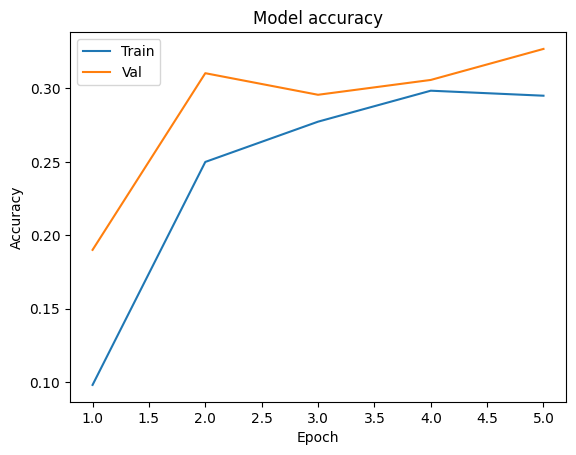

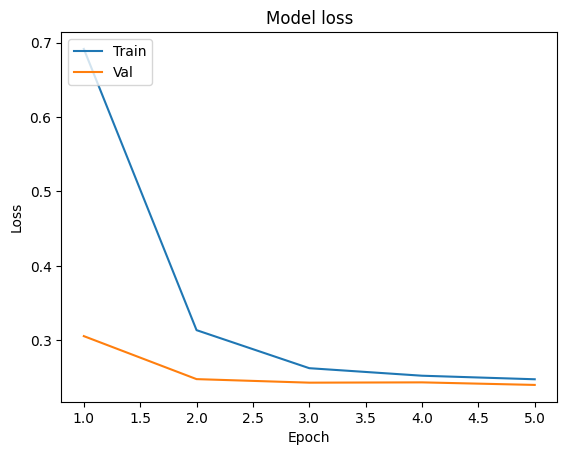

In [37]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

plot_learningCurve(history, 5)

This code loads an image, resizes it to match a predefined width and height, converts it into a NumPy array, and normalizes the pixel values. Then, it reshapes the image array to match the input shape expected by the model. The model predicts the probabilities of different classes for the image, and the top three classes with the highest probabilities are identified. Finally, it prints the names of these top three classes based on the model's predictions.

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')
1/1 [==============================] - 0s 498ms/step
Drama
Comedy
Action


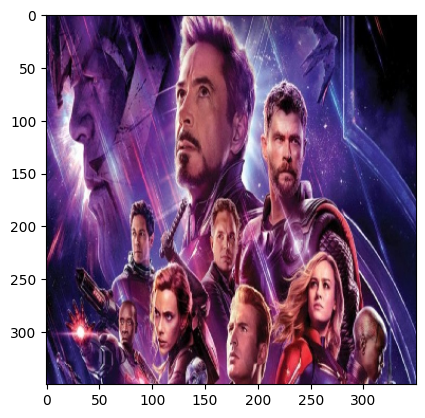

In [43]:
img = image.load_img('Movies-Poster_Dataset/endgame.jpg', target_size=(img_w, img_h, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, img_w, img_h, 3)

classes = df.columns[2:]
print(classes)
y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-4:-1]

for i in range(3):
  print(classes[top3[i]])

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')
1/1 [==============================] - 0s 39ms/step
Drama
Comedy
Action
Romance
Adventure


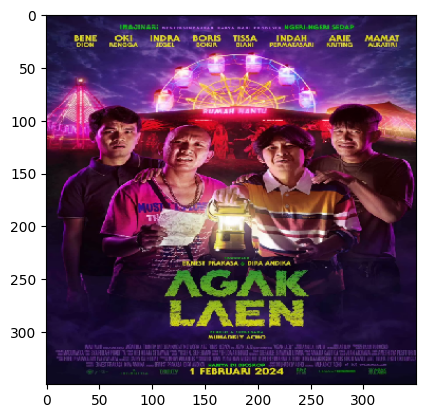

In [49]:
img = image.load_img('Movies-Poster_Dataset/agaklaen.png', target_size=(img_w, img_h, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, img_w, img_h, 3)

classes = df.columns[2:]
print(classes)
y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-6:-1]

for i in range(5):
  print(classes[top3[i]])